In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from clean import clean_data
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the dataset
auto = pd.read_csv('adverts.csv')
auto = clean_data(auto)

In [23]:
seed = 3

In [24]:
X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

# Feature Ranking

In [25]:
# from sklearn.feature_selection import RFECV
# from sklearn.svm import SVR
# estimator = SVR(kernel="linear")
# selector = RFECV(estimator, step=1, cv=2)
# selector = selector.fit(X, y)
# selector.support_
# selector.ranking_

# Modelling

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [27]:
# Import models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# parameter grid
# #random forest
# make_scorer
# best_model_dt
# best_model dt

In [28]:
# Instantiate generic models
models = {
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    # "Random Forest": RandomForestRegressor(),
    # "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor()
}

In [ ]:
scores = []

for name, model in models.items():
    print("\nFitting", model)
    model.fit(X_train, y_train)
    print("Predicting", model)
    y_pred = model.predict(X_test)
    print("Computing error for", model)
    mse = mean_squared_error(y_test, y_pred)
    scores.append({"Model": name, "MSE": mse})
    print(f"Model {name}, MSE: {mse}")
    
scores_df = pd.DataFrame(scores)

Fitting KNeighborsRegressor()
Predicting KNeighborsRegressor()
Computing error for KNeighborsRegressor()
Model K Neighbors Regressor, MSE: 203837178.9977426
Fitting LinearRegression()
Predicting LinearRegression()
Computing error for LinearRegression()
Model Linear Regression, MSE: 273350240.69080883
Fitting DecisionTreeRegressor()
Predicting DecisionTreeRegressor()
Computing error for DecisionTreeRegressor()
Model Decision Tree, MSE: 59467752.45794487


In [30]:
cv_scores = []

for name, model in models.items():
    score = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")  # Use negative MSE to match sklearn's convention
    for s in score:
        cv_scores.append({"Model": name, "MSE": s})

cv_scores_df = pd.DataFrame(cv_scores)

<Figure size 1000x600 with 0 Axes>

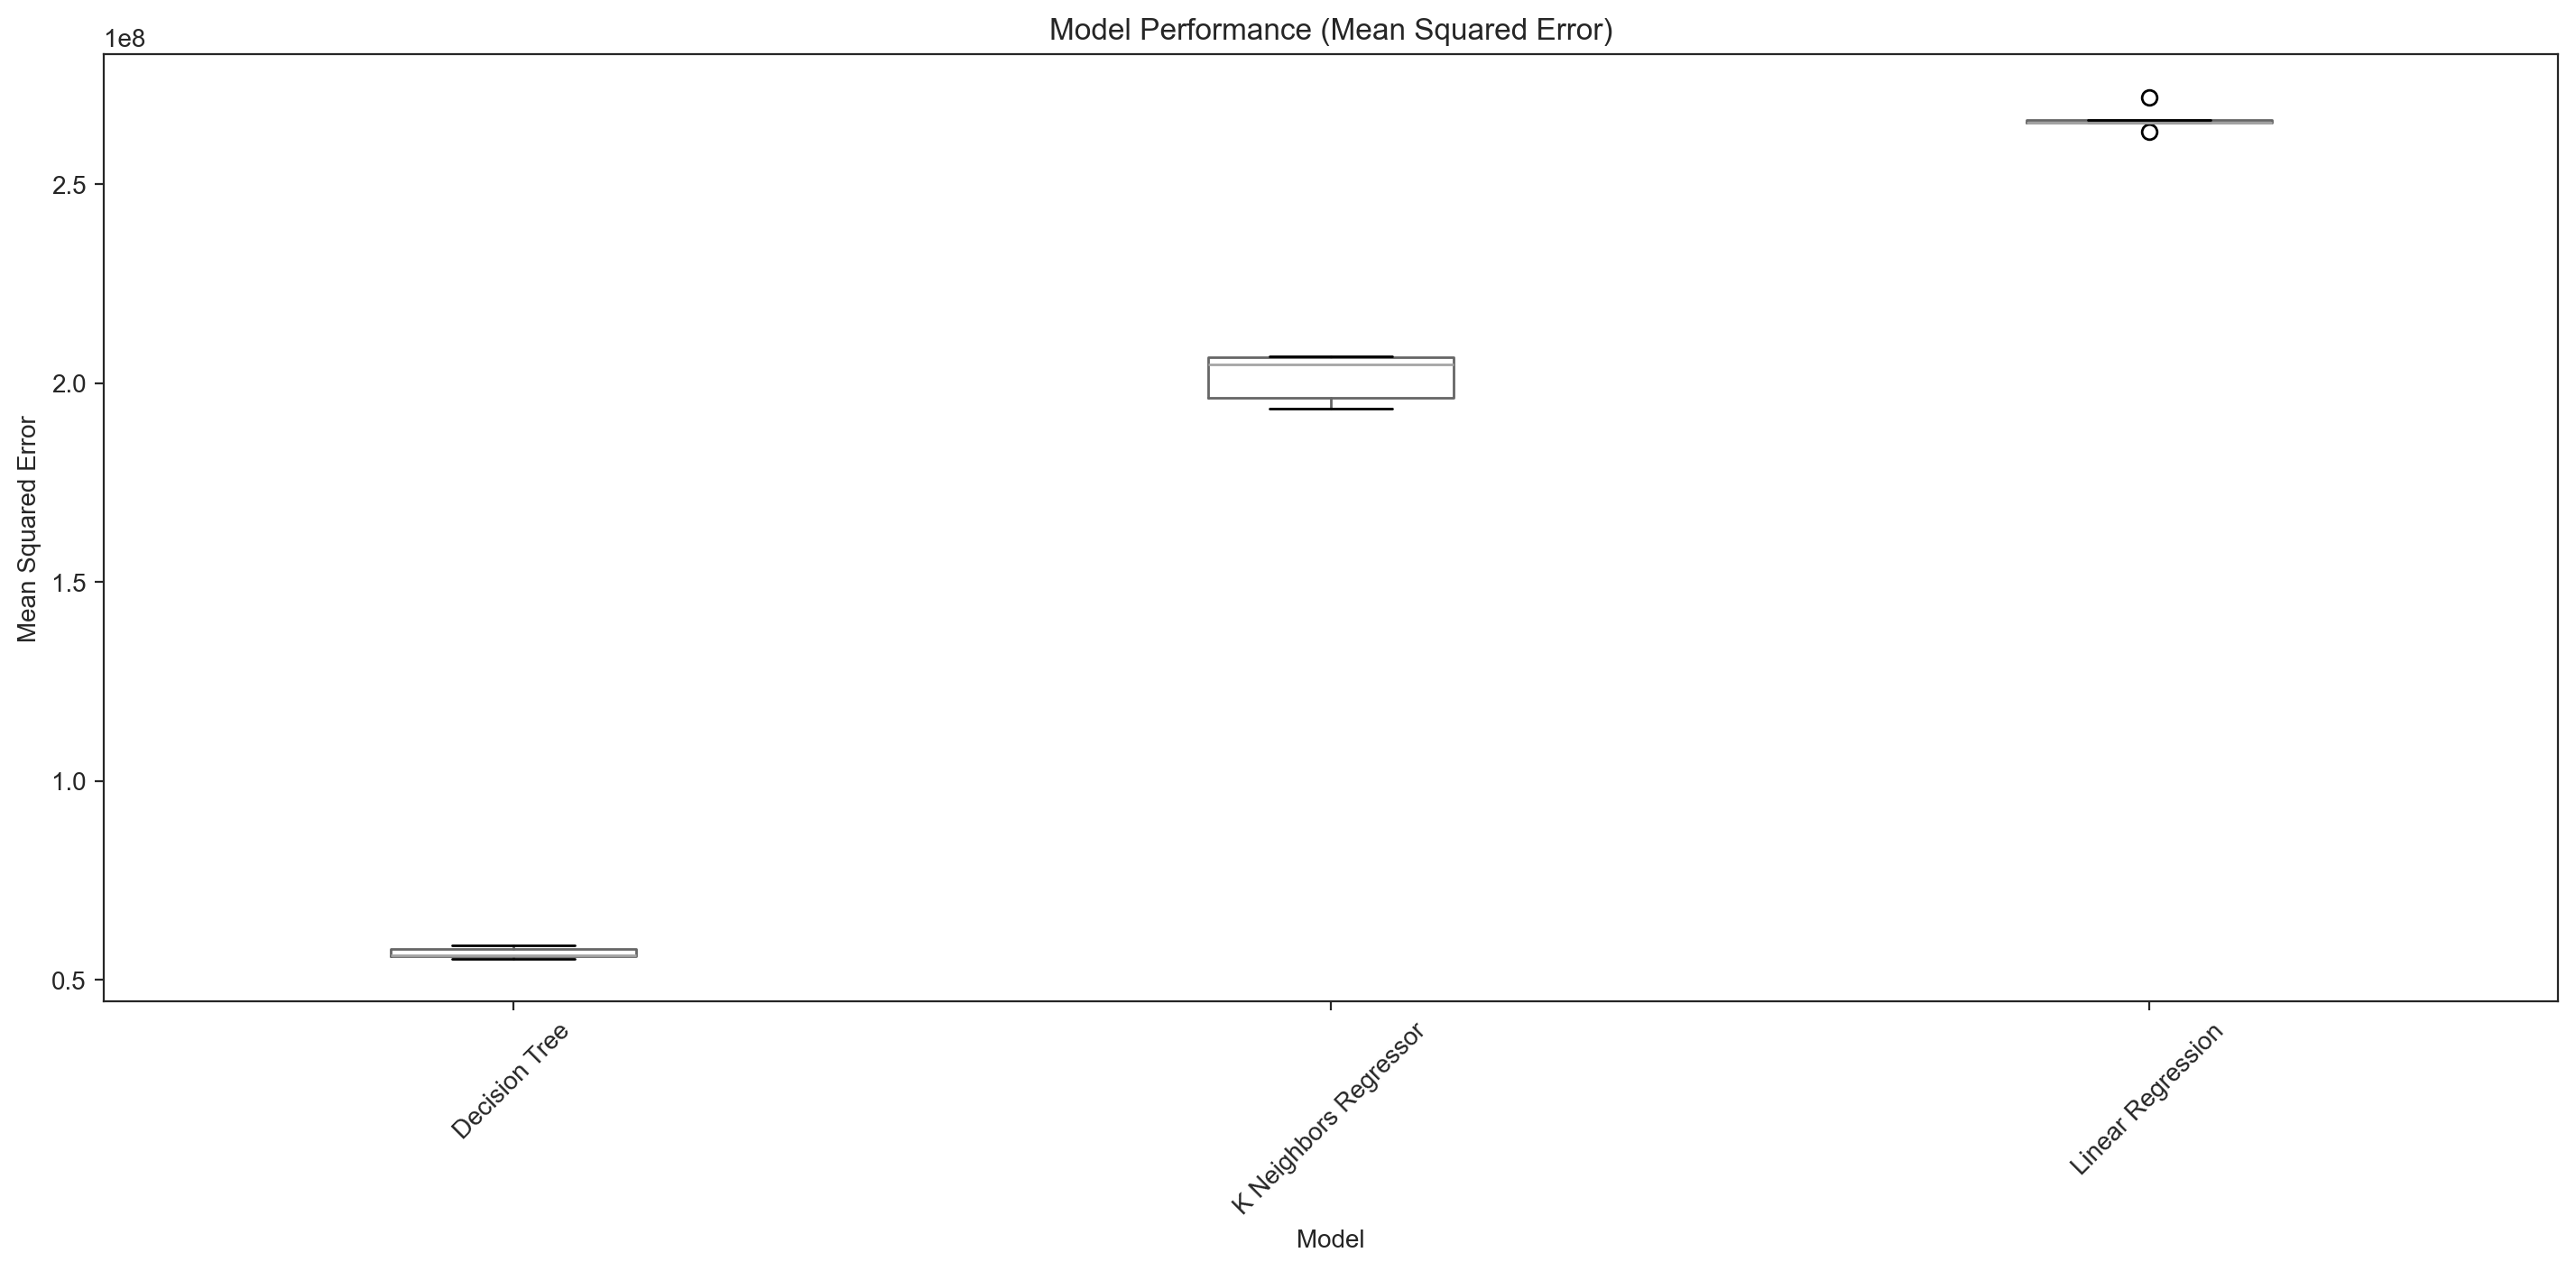

In [31]:
plt.figure(figsize=(10, 6))
cv_scores_df.boxplot(by="Model", column="MSE", grid=False)
plt.title("Model Performance (Mean Squared Error)")
plt.suptitle("")  # Remove default title
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.show()

In [32]:
# # Confustion Matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix(y_test, knn.predict(X_test))
# cm = confusion_matrix(y_test, knn.predict(X_test), labels=)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels==knn.classes_)

In [33]:
# GridSearchCV

# KNN Regressor

In [34]:
knn = KNeighborsRegressor(n_neighbors=43)

knn.fit(X_train, y_train)

print(f"Train score: {round(knn.score(X_train, y_train), 3)}\nTest score: {round(knn.score(X_test, y_test), 3)}")

Train score: 0.398
Test score: 0.359


In [35]:
print(f"Mean error: £{int(mean_squared_error(y_test, knn.predict(X_test))**0.5)}")

Mean error: £15017


In [36]:
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': knn.predict(X_test)})

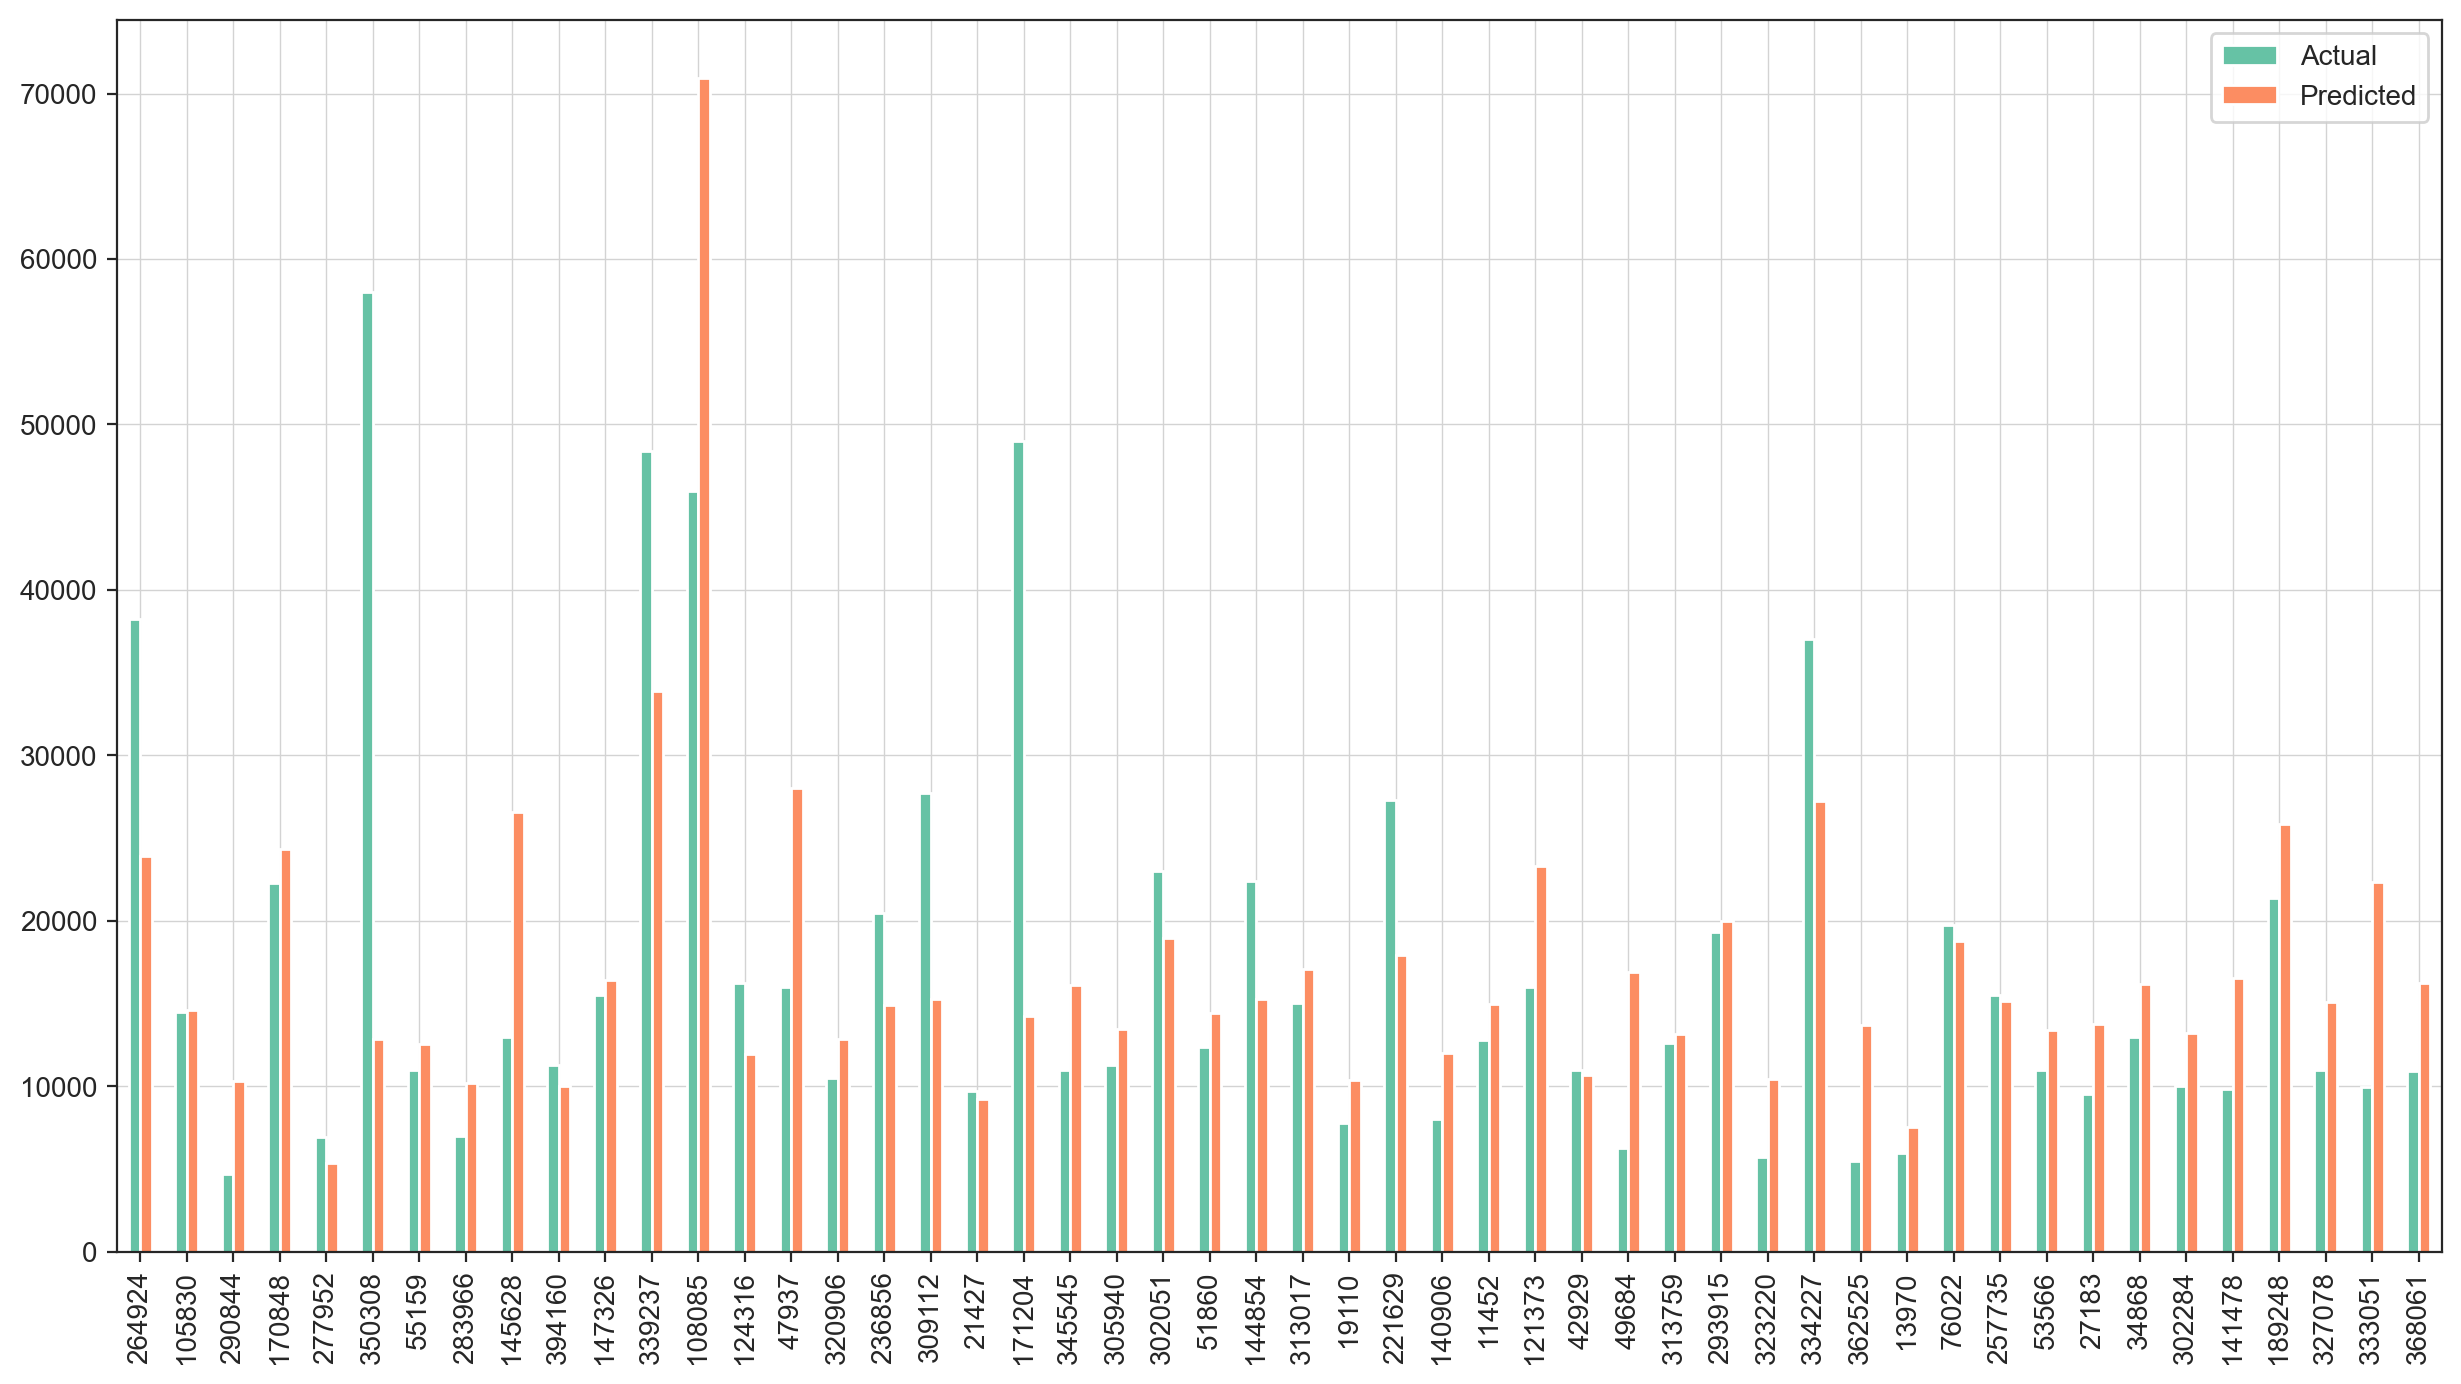

In [37]:
df_temp2 = df_temp2.sample(50)
df_temp2.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgray')
plt.show()

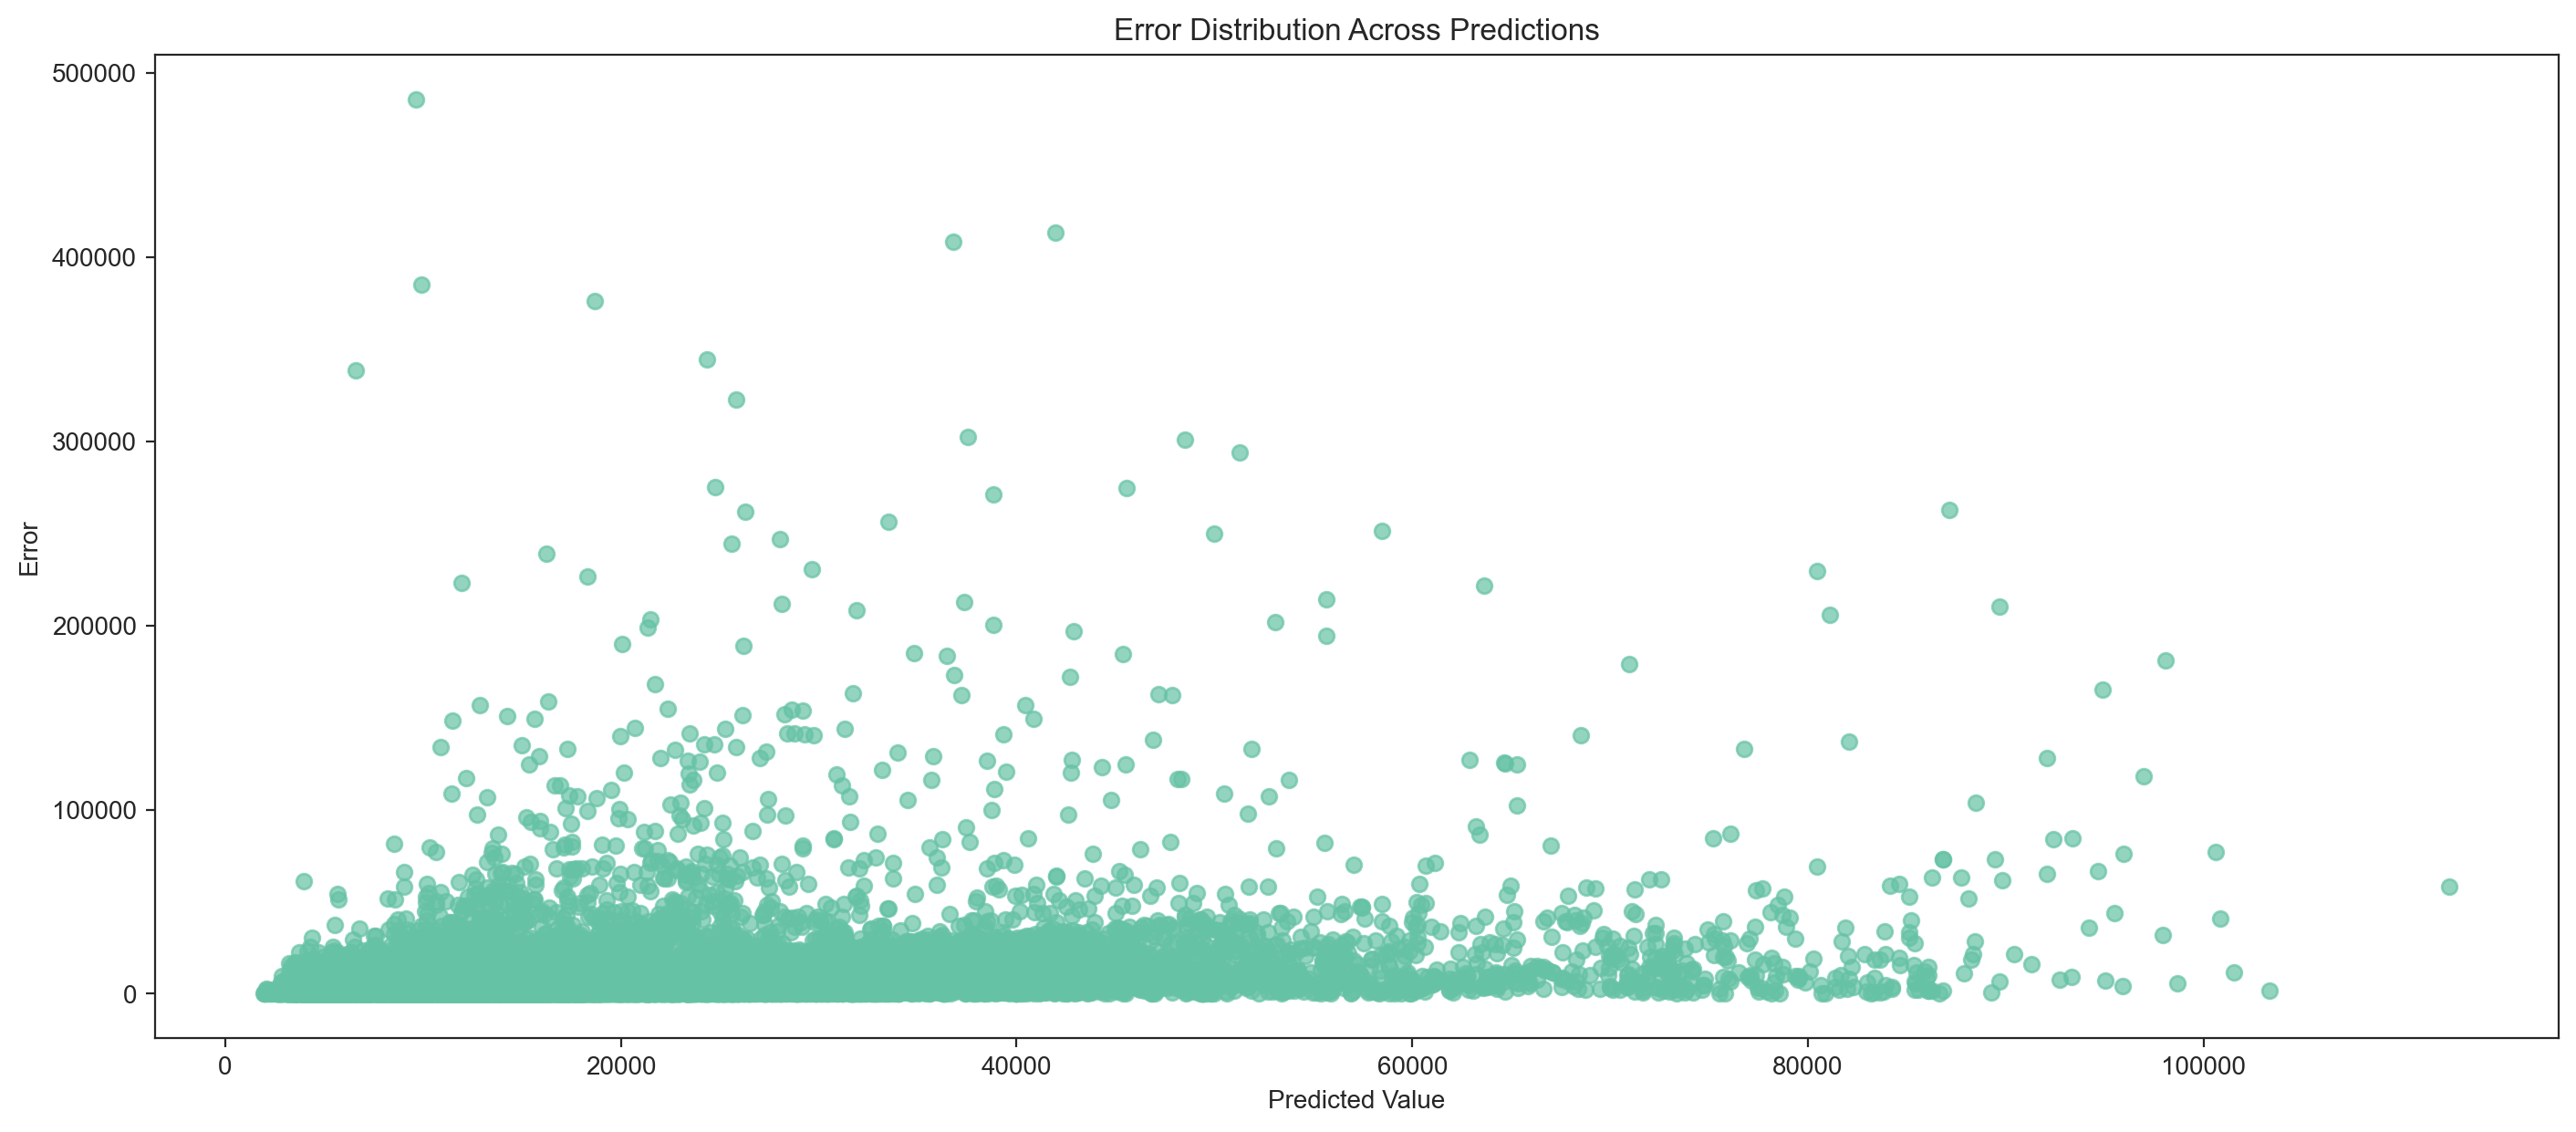

In [38]:
y_pred = knn.predict(X_test)
errors = abs(y_pred - y_test)  # Absolute error
plt.scatter(y_pred, errors, alpha=0.7)
plt.title("Error Distribution Across Predictions")
plt.xlabel("Predicted Value")
plt.ylabel("Error")
plt.show()

In [39]:
error_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'error': errors
})
extreme_errors = error_df.nlargest(10, 'error')  # Top 10 extreme errors
print(extreme_errors)
print(auto.loc[auto["price"] == extreme_errors.iloc[0]["y_true"]])

        y_true        y_pred          error
1335    495000   9640.465116  485359.534884
367220  455000  41959.395349  413040.604651
350629  445000  36810.139535  408189.860465
260103  395000   9916.837209  385083.162791
46924   395000  18658.255814  376341.744186
212760  369000  24346.069767  344653.930233
364585  345000   6591.976744  338408.023256
8850    348480  25811.744186  322668.255814
211594  339900  37529.720930  302370.279070
218991  349500  48528.209302  300971.790698
       mileage  standard_make  standard_model  year_of_registration   price  \
1335   76000.0              7             394                2018.0  495000   
4066   33049.0              7             394                1988.0  495000   
72982   1665.0              7             626                2000.0  495000   

       body_type year_listed month_listed day_listed  vehicle_condition_NEW  \
1335          14        2020           04         01                    0.0   
4066          14        2019           03

# Decision Tree

In [40]:
import dtreeviz


In [41]:
tree = DecisionTreeRegressor(max_depth=3)

tree.fit(X_train, y_train)

print(f"Train score: {round(tree.score(X_train, y_train), 3)}\nTest score: {round(tree.score(X_test, y_test), 3)}")

Train score: 0.33
Test score: 0.319


In [42]:
viz_rmodel = dtreeviz.model(tree, X, y,
                            feature_names=X.columns.tolist(),
                            target_name='mpg')

In [43]:
# viz_rmodel.view(fontname='sans-serif', scale=2)
print(export_text(tree, feature_names=X.columns.to_list()))

|--- mileage <= 10000.50
|   |--- body_type <= 5.50
|   |   |--- fuel_type_Petrol <= 0.50
|   |   |   |--- value: [37569.30]
|   |   |--- fuel_type_Petrol >  0.50
|   |   |   |--- value: [73696.50]
|   |--- body_type >  5.50
|   |   |--- body_type <= 9.50
|   |   |   |--- value: [19448.02]
|   |   |--- body_type >  9.50
|   |   |   |--- value: [33963.22]
|--- mileage >  10000.50
|   |--- year_of_registration <= 2014.50
|   |   |--- body_type <= 5.50
|   |   |   |--- value: [16009.88]
|   |   |--- body_type >  5.50
|   |   |   |--- value: [6614.83]
|   |--- year_of_registration >  2014.50
|   |   |--- body_type <= 9.50
|   |   |   |--- value: [13452.70]
|   |   |--- body_type >  9.50
|   |   |   |--- value: [19379.16]



# Linear regressors

In [44]:
lr = LinearRegression()

lr.fit(X_train, y_train)

# R2 by default amount of variance of the target explained by the model
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.2338313598042704, 0.22357599790682037)

# Gaussian Process

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)

In [16]:
gpr.fit(X, y)

: 

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test)